In [15]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [23]:
gdf_de = gpd.read_file("https://raw.githubusercontent.com/okfde/wahldaten/master/geometrien/wahlkreise/wahlkreise.geojson")

df_de = pd.read_csv(f"data_output/Germany/2021_divisiveness_constituency.csv.gz", compression="gzip")
df_de = df_de.dropna()
gdf_de = gdf_de.rename(columns={"WKR_NR": "constituency"})

data_de = df_de.groupby(["constituency"]).agg({"value": "mean"}).reset_index()
data_de = pd.merge(data_de, gdf_de, on="constituency")

data_de = gpd.GeoDataFrame(data_de)

# data_de["value"] = NormalizeData(data_de["value"])

In [22]:
gdf_es = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson")
gdf_es["province_id"] = gdf_es["cod_prov"].astype(int)

df_es = pd.read_csv(f"data_output/Spain/2019_divisiveness_province_id.csv.gz", compression="gzip")
df_es = df_es.dropna()
gdf_de = gdf_es.rename(columns={"WKR_NR": "constituency"})

data_es = df_es.groupby(["province_id"]).agg({"value": "mean"}).reset_index()
data_es = pd.merge(data_es, gdf_es, on="province_id")

data_es = gpd.GeoDataFrame(data_es)

# data_es["value"] = NormalizeData(data_es["value"])

In [34]:
geography = "department_id"
gdf_fr = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson")
gdf_fr = gdf_fr.rename(columns={"nom": "department", "code": "department_id"})

df_fr = pd.read_csv(f"data_output/France/2002_divisiveness_{geography}_std.csv.gz", compression="gzip")
df_fr = df_fr.dropna()

data_fr = df_fr.groupby([geography]).agg({"value": "mean"}).reset_index()
data_fr = pd.merge(data_fr, gdf_fr, on=geography)

data_fr = gpd.GeoDataFrame(data_fr)

# data_fr["value"] = NormalizeData(data_fr["value"])

In [20]:
gdf_it = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson")
gdf_it = gdf_it.rename(columns={"prov_istat_code": "province_id"})

df_it = pd.read_csv(f"data_output/Italy/2022_divisiveness_province_id.csv.gz", compression="gzip")
df_it = df_it.dropna()

data_it = df_it.groupby(["province_id"]).agg({"value": "mean"}).reset_index()
data_it["province_id"] = data_it["province_id"].astype(str).str.zfill(3)
data_it = pd.merge(data_it, gdf_it, on="province_id")

data_it = gpd.GeoDataFrame(data_it)

# data_it["value"] = NormalizeData(data_it["value"])

In [36]:
data = pd.concat([
    data_es,
    data_fr,
    data_it,
    data_de
])

In [37]:
data["value_2"] = NormalizeData(data["value"])

(-19.995302179954944, 20.354461779053867, 26.26860307001754, 56.42932552963157)

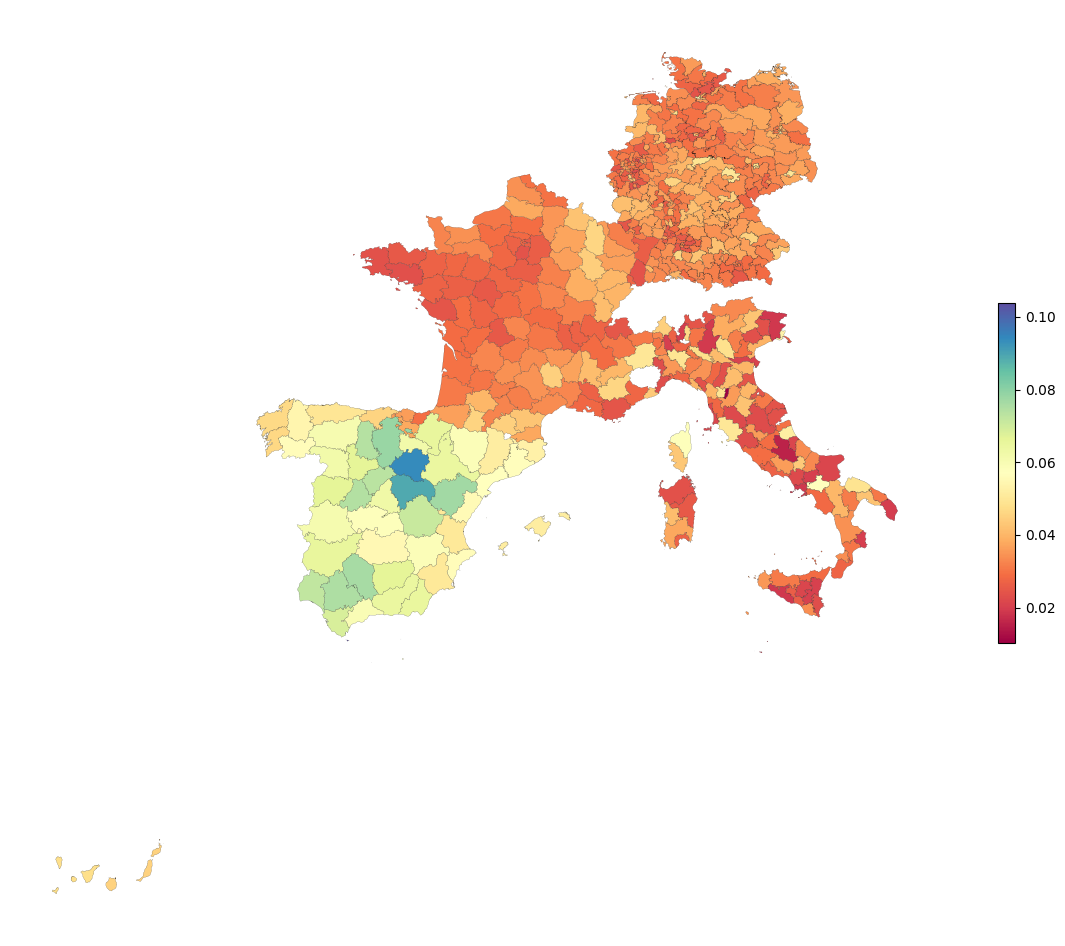

In [39]:
fig, ax = plt.subplots(figsize=(15, 15), dpi=100)

data.plot(
    column="value", ax=ax, 
    lw=0.1,
    legend=True, 
    edgecolor="black",
    cmap="Spectral",
    legend_kwds=dict(
        shrink=0.3
    ))

plt.axis("off")